In [2]:
import numpy as np   # Provides most math operations 
from matplotlib import pyplot as plt     # Provides most plotting
import seaborn as sns                    # Extra plotting
from skimage import data, io, filters, morphology, segmentation, measure

from os import listdir    # folder commands
from os.path import isfile, join  # file commands
import tifffile as tiff         # Loads tiff files as numpy arrays

plt.style.use(['default'])   # Sets image format

In [3]:
plt.style.use(['default'])
tiff_dir = "./"  ## This is the folder with the images
tiff_files=[f for f in listdir(tiff_dir) if isfile(join(tiff_dir, f)) & (f[-4:]=="tiff")]   # This makes a list of all the "tiff" files in the folder
print("TIFF files: ",tiff_files)

TIFF files:  ['IMG_20200611_104206.tiff', 'IMG_20200611_104207.tiff', 'IMG_20200611_104209.tiff', 'IMG_20200611_104210.tiff', 'IMG_20200611_104216.tiff', 'IMG_20200611_104218.tiff', 'IMG_20200611_104219.tiff', 'IMG_20200611_104221.tiff', 'IMG_20200611_104221_1.tiff', 'IMG_20200611_104223.tiff', 'IMG_20200611_104224.tiff']


In [41]:
tiff_name = join(tiff_dir, tiff_files[7])  ## Here is where you specify the file
I = tiff.imread(tiff_name)  # This loads the image file into memory

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


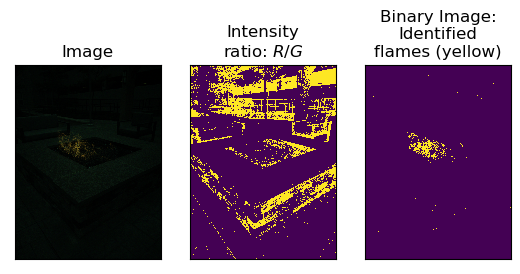

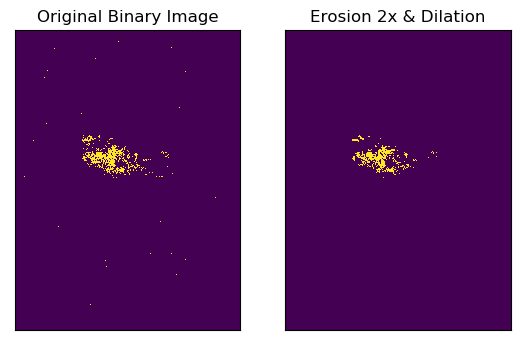

In [42]:
fig, ax = plt.subplots(ncols =3)

ax[0].set_title("Image")
ax[0].imshow(I/256**2)  ## imshow doesn't handle high bit-depths so the image is rescaled

I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable

I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization

ax[1].set_title("Intensity\nratio: $R/G$")
ax[1].imshow(I_cr)  

I_sig = (I[:,:,0] > 1.0*I[:,:,1]) & I_intensity # Create image identifying flames on brightness & color basis
I_sig2 = (I[:,:,0] < 1.0*I[:,:,1]) & I_intensity # Create image identifying flames on brightness & color basis
ax[2].set_title("Binary Image:\nIdentified\nflames (yellow)")
ax[2].imshow(I_sig)  

#I_sig3 = filters.gaussian(I_sig) 
#I_sig3 = filters.median(I_sig) 
I_sig3 = morphology.erosion(I_sig)
I_sig3 = morphology.erosion(I_sig3)
I_sig3 = morphology.dilation(I_sig3)
I_sig3 = morphology.dilation(I_sig3)
I_sig3 = morphology.dilation(I_sig3)




[ax[j].get_yaxis().set_visible(False) for j in range(3)]
[ax[j].get_xaxis().set_visible(False) for j in range(3)]
fig, ax = plt.subplots(ncols = 2)
ax[0].set_title("Original Binary Image")
ax[1].set_title("Erosion 2x & Dilation")
ax[0].imshow(I_sig)
ax[1].imshow(I_sig3)
[ax[j].get_yaxis().set_visible(False) for j in range(2)]
[ax[j].get_xaxis().set_visible(False) for j in range(2)]
plt.show()

#inv_img = np.invert(I_sig3)
#labels = segmentation.slic(inv_img)
#regions = measure.regionprops(labels)
#areas = []
#for region in regions:
    #areas.append(region.area)
    #print(region.centroid)
#fig, ax = plt.subplots()
#plt.hist(areas)
#plt.show()
#ax.imshow(inv_img)

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


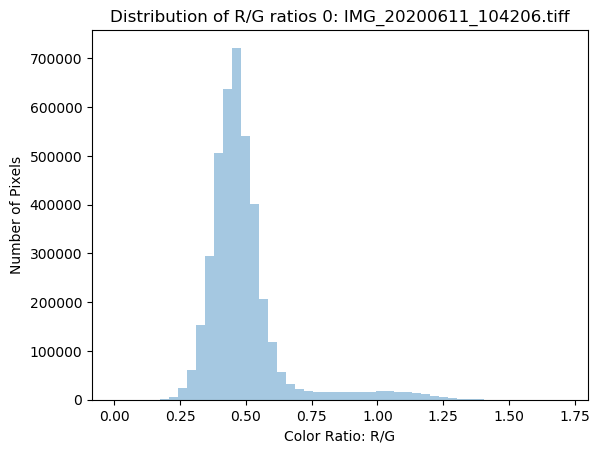

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


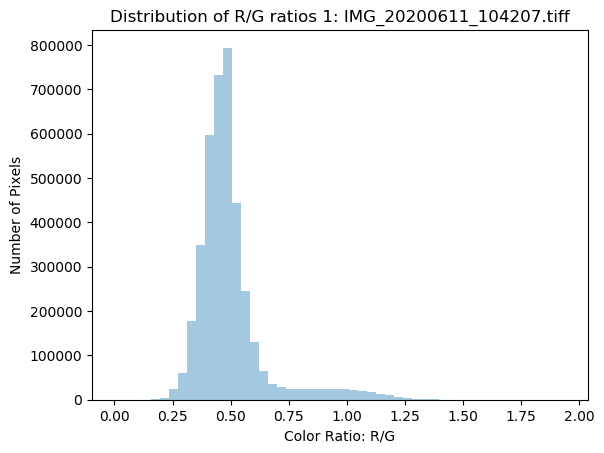

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


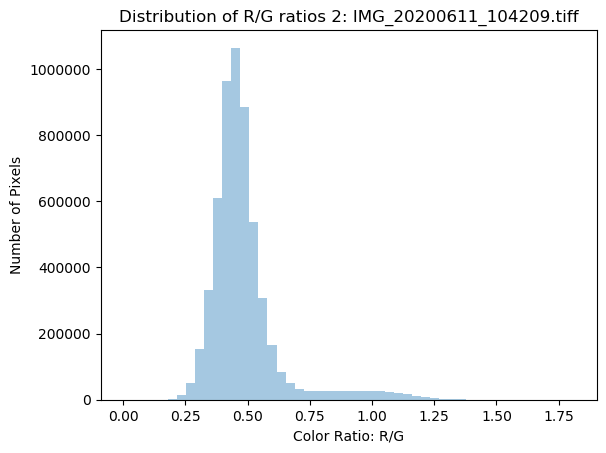

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


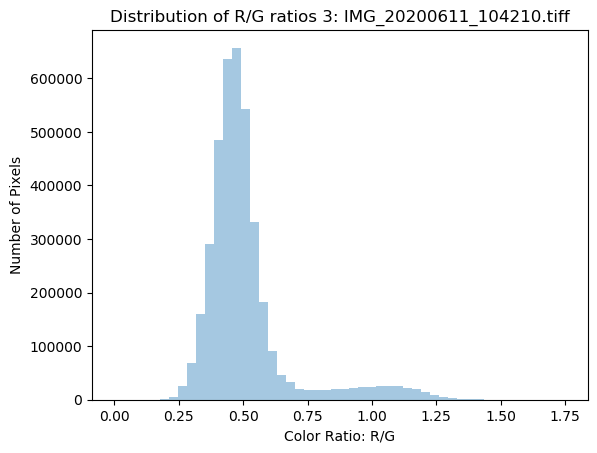

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


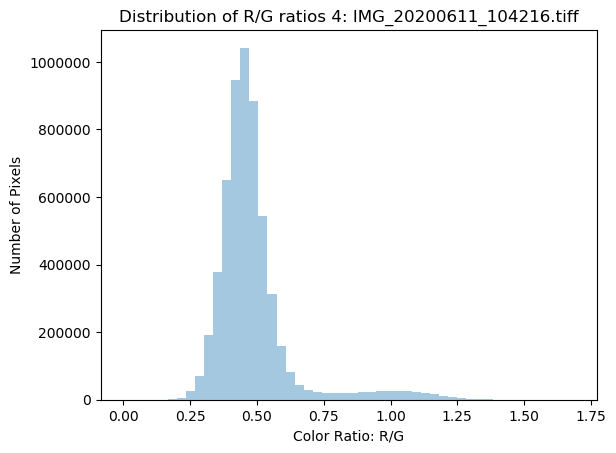

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


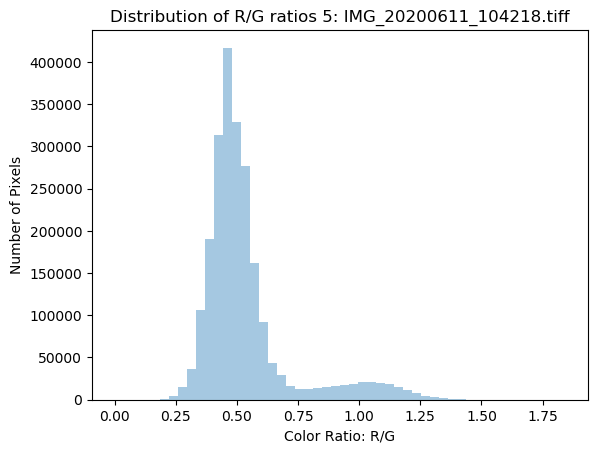

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


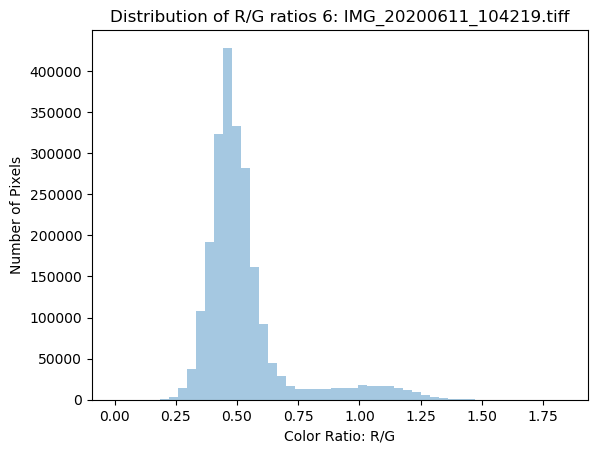

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


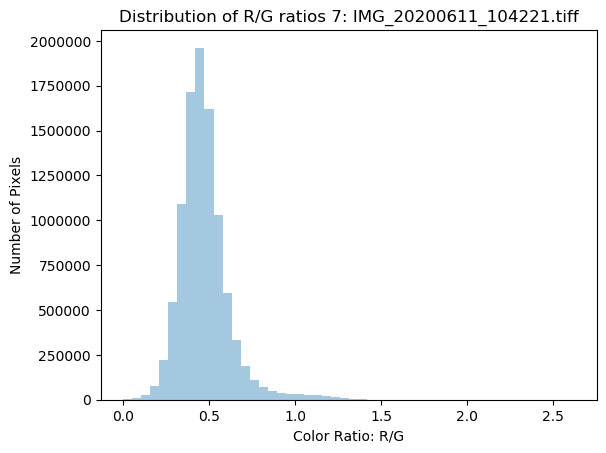

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


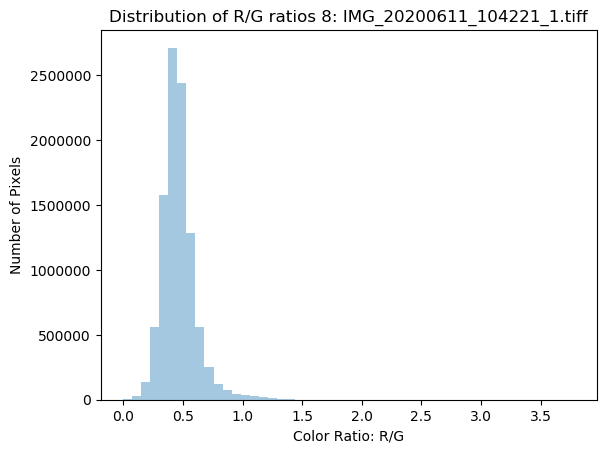

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


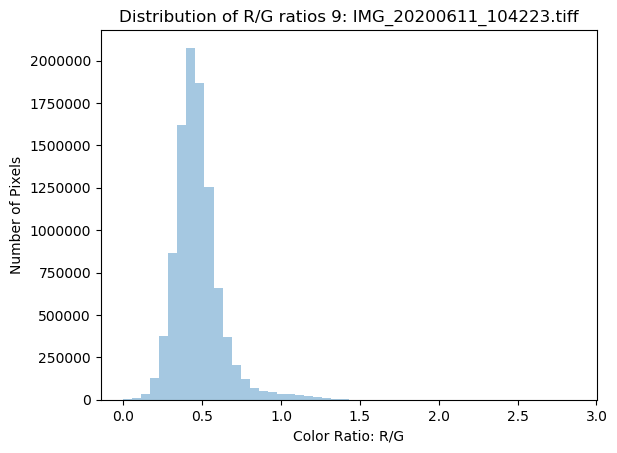

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


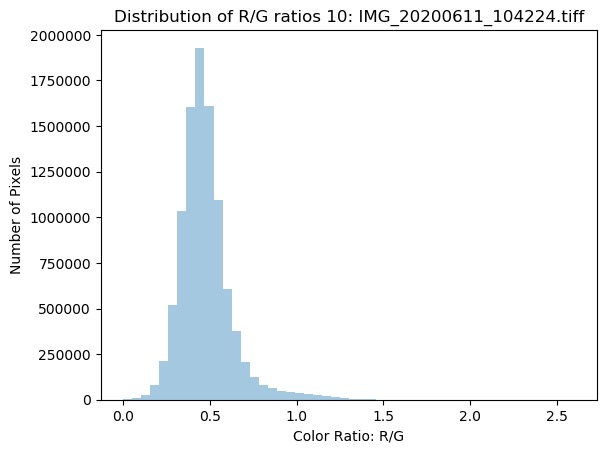

In [7]:
image_Num= 0
for x in tiff_files:
    fig, ax = plt.subplots()
    tiff_name = join(tiff_dir, tiff_files[image_Num])
    I = tiff.imread(tiff_name)
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios
    sns.distplot(I_cr[I_intensity],ax= ax,hist = True,norm_hist = False, kde = False)
    ax.set_ylabel("Number of Pixels")
    ax.set_xlabel("Color Ratio: R/G")
    ax.set_title("Distribution of R/G ratios "+str(image_Num)+ ": "+tiff_files[image_Num])
    image_Num+=1
    plt.show()

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


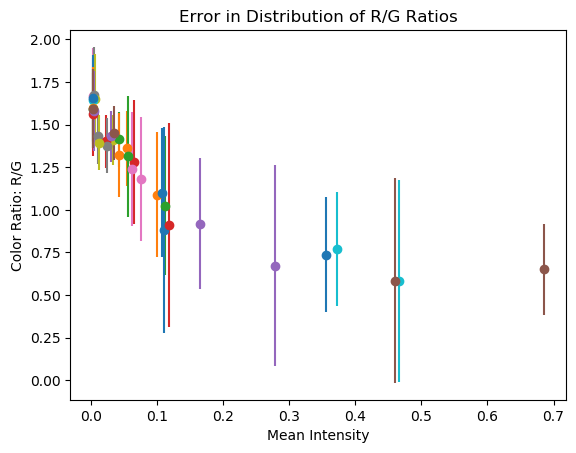

In [121]:
fig, ax= plt.subplots() 
image_Num= 0
for x in tiff_files:
    tiff_name = join(tiff_dir, tiff_files[image_Num])
    I = tiff.imread(tiff_name)
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    mean = np.mean(I_cr[I_intensity])
    plt.errorbar(np.mean(I_intensity), mean, np.std(I_cr[I_intensity]), linestyle='None', marker='o')
    image_Num+=1

#plt.errorbar(imageNum, mean, np.std(I_cr[I_intensity]), linestyle='None', marker='o')
ax.set_ylabel("Color Ratio: R/G")
ax.set_xlabel("Mean Intensity")
ax.set_title("Error in Distribution of R/G Ratios")
plt.show()